In [1]:
import pandas as pd
import numpy as np
import json
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Carga de Datos y Acumulación por Día

In [4]:
folders = ('01-10-19_PT5M','02-10-19_PT5M','05-10-19_PT5M','08-10-19_PT5M')
assets = pd.read_csv('southcentral-asset.csv',sep=';')
datosNTO={}

for i,r in assets.iterrows():
    #print(r.Name)
    ultimoMin = 0
    for j in np.arange(0,len(folders)):
        with open(folders[j]+'/'+r.File, 'r') as f:
            datastore = json.load(f)
            #print('File readed:'+folders[j]+'/'+r.File)
        #tempCPU = pd.DataFrame(datastore["value"][0]["metricValues"])
        #tempNTI = pd.DataFrame(datastore["value"][1]["metricValues"])
        tempNTO = pd.DataFrame(datastore["value"][2]["metricValues"])
        tempMin = np.arange(ultimoMin,ultimoMin+(tempNTO.shape[0]*5),step=5)
        #tempCPU['minute'] = tempMin
        #tempNTI['minute'] = tempMin
        tempNTO['minute'] = tempMin
        ultimoMin = tempMin[len(tempMin)-1]+5
        #print(ultimoMin)
        #tempCPU = tempCPU.dropna(axis=0,how='any')
        #tempNTI = tempNTI.dropna(axis=0,how='any')
        tempNTO = tempNTO.dropna(axis=0,how='any')
        if r.Name in datosNTO:
            #datosCPU[r.Name] = datosCPU[r.Name].append(tempCPU)
            #datosNTI[r.Name] = datosNTI[r.Name].append(tempNTI)
            datosNTO[r.Name] = datosNTO[r.Name].append(tempNTO)
        else:
            #datosCPU[r.Name] = tempCPU
            #datosNTI[r.Name] = tempNTI
            datosNTO[r.Name] = tempNTO

In [5]:
accumNTO={}
for i,r in assets.iterrows():
    for d in np.arange(1,11):
        temp = datosNTO[r.Name][(datosNTO[r.Name]['minute'] >= ((d-1)*1440)) & (datosNTO[r.Name]['minute'] < (d*1440))]
        sumx = temp.apply(np.sum,axis= 0)
        accumNTO[str(d)+'-'+r.Name] = pd.DataFrame(sumx[1:5])

In [6]:
def obtenerDatosAcumulados(nombreEmpresa):
    total = np.array([[1,accumNTO['1-'+nombreEmpresa].transpose()['total'][0]]])
    total = np.append(total, [[2,accumNTO['2-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[3,accumNTO['3-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[4,accumNTO['4-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[5,accumNTO['5-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[6,accumNTO['6-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[7,accumNTO['7-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[8,accumNTO['8-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[9,accumNTO['9-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[10,accumNTO['10-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    acumm = pd.DataFrame(total,columns=['dia','acumulado'])
    acumm.dropna(axis=0,how='any')
    return acumm

In [8]:
acumulados = {}
for i in np.arange(0,51):
    company = assets.Name[i]
    Acumm = obtenerDatosAcumulados(company)
    acumulados[company]=Acumm

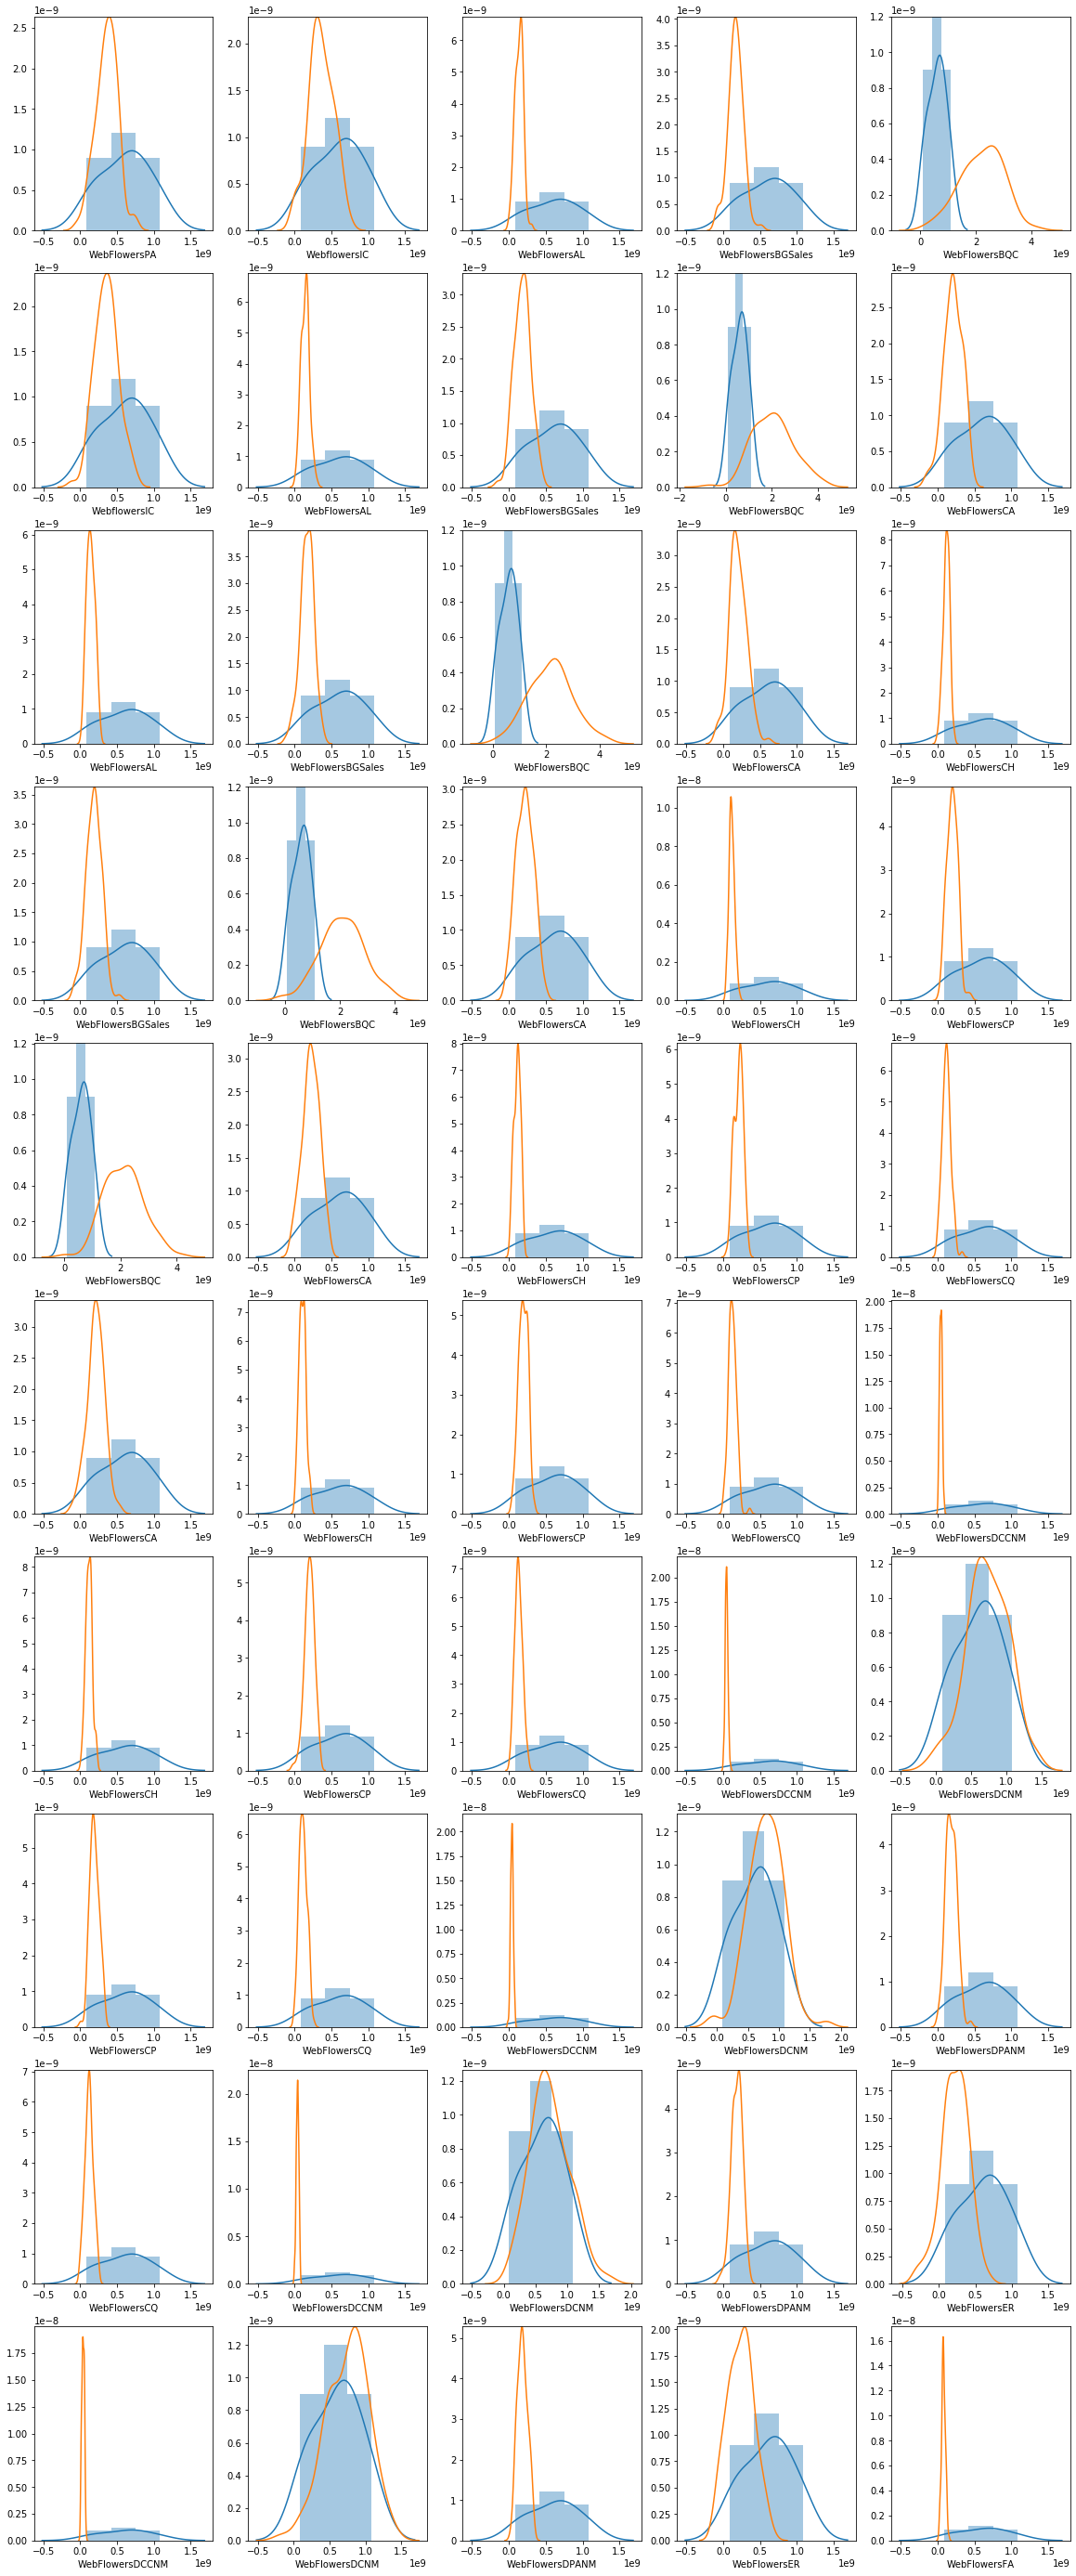

In [12]:
fig, axs = plt.subplots(10,5,figsize=(20,50))
for r in np.arange(0,10):
    for c in np.arange(0,5):
        company = assets.Name[r+c]
        m = acumulados[company].describe()['acumulado']['mean']
        s = acumulados[company].describe()['acumulado']['std']
        normal = np.random.normal(loc=m,scale=s,size=100)
        sns.distplot((acumulados['WebFlowersLM']['acumulado']),ax=axs[r][c],axlabel=company)
        sns.distplot(normal, hist=False,ax=axs[r][c]);